로지스틱회귀
==
- 시험 합격자와 불합격자의 시험공부시간 관계
- 로지스틱 회귀로 모델링

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

합격, 불합격자 데이터
--

In [2]:
pass_time = [4.4,4.6,4.8,5.0,5.2,5.4,5.6,5.8,6.0,6.2,6.4,6,6.2,6.4,6.6,6.8,6.5,6.6,6.7,6.9,7,7.1,7.2,7.3,7.4,7.5,7.7,7.8,7.9,8,8.3, 8.5, 9, 9, 9.5, 10, 12, 15, 16, 16, 16.5, 17, 17, 17, 17.5,]
fail_time = [1, 2,2.1,2.2,2.3,2.5,2.6,2.7,2.8,2.9, 3,3.2,3.4,3.5,3.6,3,3,3.5, 4,4.2,4.4,4.6,4.8, 5,5.2,5.4,5.6, 6, 6, 7, 7, 8,12.5]

In [3]:
p_frame = pd.DataFrame(pass_time, columns=['study'])
p_frame['pass'] =1
p_frame

,study,pass
0,4.4,1
1,4.6,1
2,4.8,1
3,5.0,1
4,5.2,1
5,5.4,1
6,5.6,1
7,5.8,1
8,6.0,1
9,6.2,1


In [4]:
f_frame = pd.DataFrame(fail_time, columns=['study'])
f_frame['pass'] =0
f_frame

,study,pass
0,1.0,0
1,2.0,0
2,2.1,0
3,2.2,0
4,2.3,0
5,2.5,0
6,2.6,0
7,2.7,0
8,2.8,0
9,2.9,0


In [5]:
frames = [p_frame, f_frame]
sum = pd.concat(frames)
x = sum['study'].values
y = sum['pass'].values

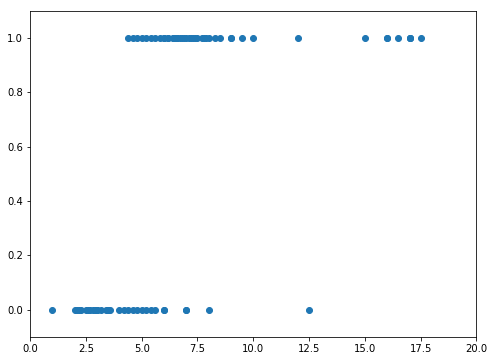

In [6]:
fig = plt.figure(figsize=(8,6))
plt.xlim(0, 20)
plt.ylim(-0.1, 1.1)
plt.xlabel='Study time'
plt.ylabel='Pass rate'
plt.scatter(x, y )

In [7]:
from sklearn.linear_model import LogisticRegression

로지스틱 리그레션 모델
--

In [8]:
model = LogisticRegression()
model.fit(x.reshape(-1,1),y.reshape(-1,1))

/Users/hwa-jongkim/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
print(model.coef_)
print(model.intercept_)

[[0.47146706]]
[-2.34913039]


새로운 값에 대한 예측
--


In [10]:
model.predict(7)

array([1])

In [11]:
def logreg(x):
    return 1 /(1+np.exp(-x))

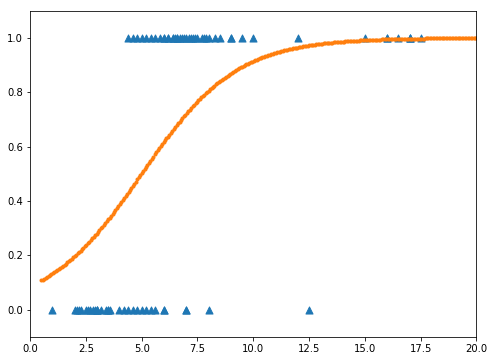

In [12]:
fig = plt.figure(figsize=(8,6))
plt.xlim(0, 20)
plt.ylim(-0.1, 1.1)
plt.xlabel='Study time'
plt.ylabel='Pass rate'
plt.scatter(x, y, marker = '^',s=50)

XX = np.linspace(0.5,20,300)
plt.scatter(x=XX,y=logreg(model.coef_*XX+model.intercept_),marker=".")